In [1]:
versioninfo()

Julia Version 1.8.5
Commit 17cfb8e65ea (2023-01-08 06:45 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 12 × Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, skylake)
  Threads: 1 on 12 virtual cores


## 12-2. 基本的な道具の使い方

※ 本文とは環境等を少し変えています（コードはほぼ同一です）  
※ `Chapter12-1..ipynb` を一通り実行済、という前提となります。

In [2]:
]activate stats_wk

  Activating project at `/path/to/JuliaBook2023Samples/notebooks/Chapter12/stats_wk`


### 12-2-1. 可視化（データプロット）の基本

#### コード12-2. `Plots.jl` の使用例(1)：関数のみを指定してプロット

In [3]:
using Plots, StatsPlots  # 環境によっては時間がかかります、以下略

In [4]:
ENV["GKS_ENCODING"] = "utf8";  # ラベル等に日本語を表示する際に必要

In [5]:
gr()  # GR バックエンドを使用することを明示

Plots.GRBackend()

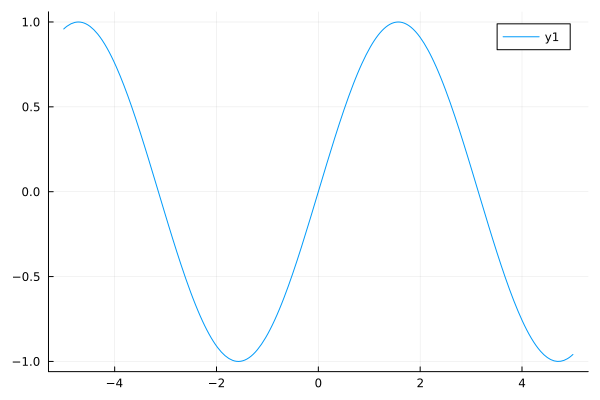

In [6]:
plot(sin)  # 最初のプロットは時間がかかる場合があります

#### コード12-3. `plot()` の使用例(2)：関数と定義域を指定してプロット

In [ ]:
# `using Plots`～`gr()` 略

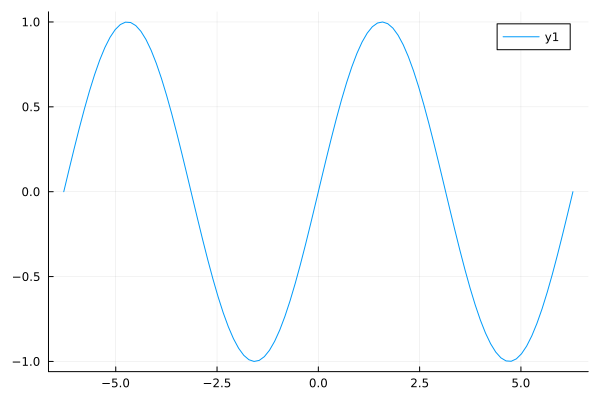

In [8]:
xs = range(-2π, 2π, length=100);
plot(sin, xs)

#### コード12-4. `plot()` の使用例(3)：データ（1次元配列）を指定してプロット

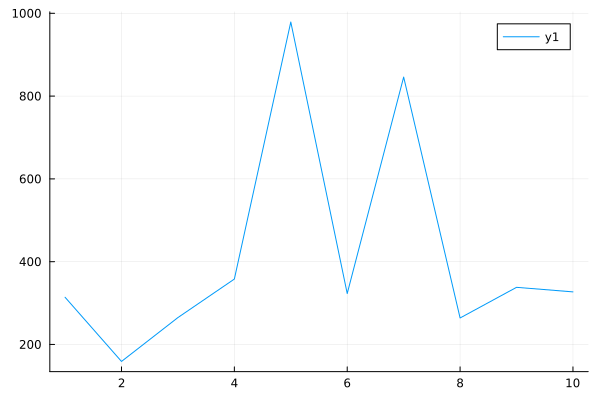

In [9]:
ns = [314, 159, 265, 358, 979, 323, 846, 264, 338, 327];
plot(ns)

#### コード12-5. `plot()` の使用例(4)：データ（x軸、y軸）を指定してプロット

In [10]:
using Dates

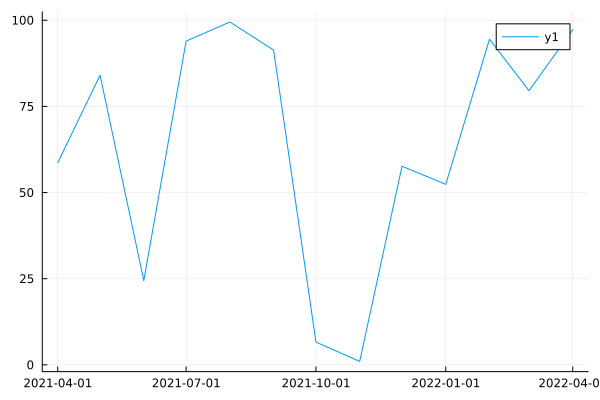

In [11]:
xs = Date(2021,4,1):Month(1):Date(2022,4,1);
ys = rand(13) .* 100;
plot(xs, ys)

#### コード12-6. `plot()` の使用例(5)：関数2つ（x / y）と媒介変数（値列）を指定してプロット

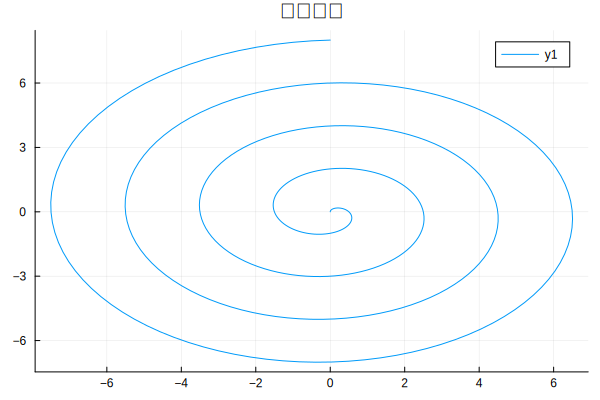

In [12]:
ts = range(0, 8, length=400);
plot(t->t*sinpi(t), t->t*cospi(t), ts,
    title="代数螺旋",
    fontfamily="sans-serif-roman")

#### コード12-7. 線種の例

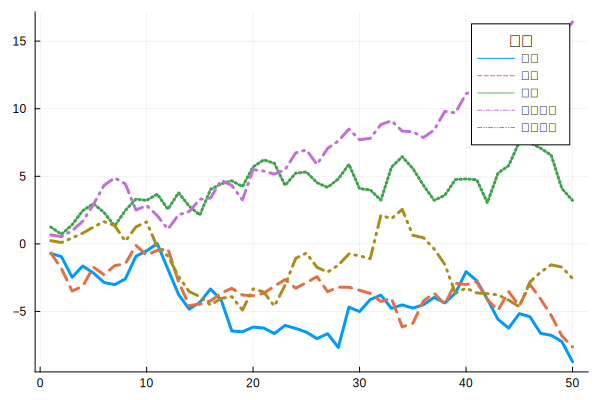

In [13]:
sampledata = cumsum(randn(50, 5), dims=1);  # 50行5列のランダムデータ
plot(sampledata,
    lw = 3,  # ←線の太さ（`linewidth`）
    ls = [:solid :dash :dot :dashdot :dashdotdot],
    legendtitle="線種",  # 凡例のタイトル
    labels=["実線" "破線" "点線" "一点鎖線   " "二点鎖線   "],
    fontfamily="sans-serif-roman"
)

#### コード12-8. 点種の例（兼、散布図プロット（`scatter()`）の例）

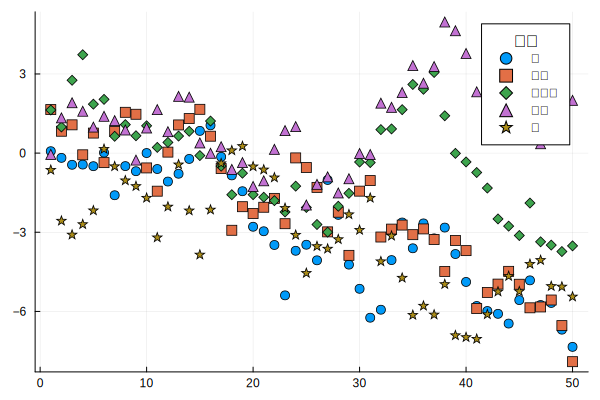

In [14]:
sampledata = cumsum(randn(50, 5), dims=1);  # 50行5列のランダムデータ
scatter(sampledata,  # `plot(～; st=:scatter, ～)` と同じ
    ms = 5,  # 点のサイズ（`markersize`）
    marker = [:circle :rect :diamond :utriangle :star5],
    legendtitle="点種",
    labels=["丸" "四角" "ダイヤ  " "三角" "星"],
    fontfamily="sans-serif-roman"
)

#### コード12-9. 複数のプロットの重ね合わせ例（ポアソン分布の計測値と理論値）

In [15]:
using SpecialFunctions: gamma

In [16]:
function poissonchoice(λ=4.0, l=100)
    r = λ / l
    sum(rand() < r for _=1:l)
end

poissonchoice (generic function with 3 methods)

In [17]:
poissoncurve(λ) = k -> λ^k * exp(-λ) / gamma(k+1)  # `gamma()` はガンマ関数

poissoncurve (generic function with 1 method)

In [18]:
λ = 4.0;

In [19]:
# データ無しで `plot()` を呼び出すことで謂わば「キャンバス」を用意
plt = plot(title="ポアソン分布", fontfamily="sans-serif-roman");

In [20]:
pdist = [poissonchoice(λ) for _=1:1000];

# ↓ `plot!(plt, ～; st=:histogram)` と同じ
histogram!(plt, pdist, bins=0:15, norm=true, label="計測値  ");

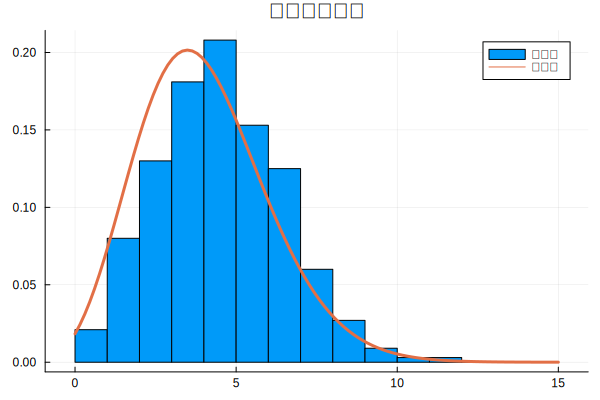

In [21]:
plot!(plt, poissoncurve(λ), range(0, 15, length=100), lw=3, label="理論値  ")

### 12-2-2. データフレームの基本

#### コード12-10. `DataFrames.jl` の使用例(1)：簡単なデータフレームの作成例

In [22]:
using DataFrames

In [23]:
df_sample = DataFrame(;
    name=["Alice", "Bob", "Carol"],
    age=[19, 24, 35],
    height=[158.0, 172.3, 163.5],
)

,name,age,height
,String,Int64,Float64
1,Alice,19,158.0
2,Bob,24,172.3
3,Carol,35,163.5


In [24]:
describe(df_sample)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,name,,Alice,,Carol,0,String
2,age,26.0,19,24.0,35,0,Int64
3,height,164.6,158.0,163.5,172.3,0,Float64


#### コード12-11. `DataFrames.jl` の使用例(2)：行（データ）の追加例

In [25]:
push!(df_sample, ("Dave", 29, 167.0))

,name,age,height
,String,Int64,Float64
1,Alice,19,158.0
2,Bob,24,172.3
3,Carol,35,163.5
4,Dave,29,167.0


In [26]:
data4append = [
    ("Ellen", 20, 129.3),
    ("Frank", 9, 99.9),
]

2-element Vector{Tuple{String, Int64, Float64}}:
 ("Ellen", 20, 129.3)
 ("Frank", 9, 99.9)

In [27]:
df4append = DataFrame([r[i] for r=data4append, i=1:ncol(df_sample)], names(df_sample))

,name,age,height
,Any,Any,Any
1,Ellen,20,129.3
2,Frank,9,99.9


In [ ]:
# ↑列の型が `Any` となってしまうが追加時に適切に扱われるので問題ない

In [28]:
append!(df_sample, df4append)

,name,age,height
,String,Int64,Float64
1,Alice,19,158.0
2,Bob,24,172.3
3,Carol,35,163.5
4,Dave,29,167.0
5,Ellen,20,129.3
6,Frank,9,99.9


In [29]:
describe(df_sample)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,name,,Alice,,Frank,0,String
2,age,22.6667,9,22.0,35,0,Int64
3,height,148.333,99.9,160.75,172.3,0,Float64


#### コード12-12. `DataFrames.jl` の使用例(3)：列（変数）の追加例

In [30]:
insertcols!(df_sample, :weight=>[missing, 72.6, 58.0, 80.1, 129.3, 99.9])
# `df_sample[!, :weight] = [missing, 72.6, 58.0, 80.1, 129.3, 99.9]` でもOK
# （ただし戻り値は追加したデータ）

,name,age,height,weight
,String,Int64,Float64,Float64?
1,Alice,19,158.0,missing
2,Bob,24,172.3,72.6
3,Carol,35,163.5,58.0
4,Dave,29,167.0,80.1
5,Ellen,20,129.3,129.3
6,Frank,9,99.9,99.9


In [31]:
describe(df_sample)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,name,,Alice,,Frank,0,String
2,age,22.6667,9,22.0,35,0,Int64
3,height,148.333,99.9,160.75,172.3,0,Float64
4,weight,87.98,58.0,80.1,129.3,1,"Union{Missing, Float64}"


#### コード12-13. `DataFrames.jl` の使用例(4)：インデクシングによるデータの抽出

In [32]:
df_sample[!, :name]

6-element Vector{String}:
 "Alice"
 "Bob"
 "Carol"
 "Dave"
 "Ellen"
 "Frank"

In [33]:
df_sample[!, :name] === df_sample[!, :name]
# 元のデータを参照しているだけなのでオブジェクトとして同一

true

In [34]:
df_sample[!, :name] == df_sample[:, :name] !== df_sample[!, :name]
# `:` を指定するとコピーを作成

true

In [35]:
df_sample[!, [:name, :age]]  # `df_sample[:, [:name, :age]]` としてもほぼ同様

,name,age
,String,Int64
1,Alice,19
2,Bob,24
3,Carol,35
4,Dave,29
5,Ellen,20
6,Frank,9


In [36]:
row = df_sample[1, :]

,name,age,height,weight
,String,Int64,Float64,Float64?
1,Alice,19,158.0,missing


In [37]:
row.name

"Alice"

In [38]:
row.age

19

In [39]:
(row...,)

("Alice", 19, 158.0, missing)

In [40]:
ntrow = (;row...,);

In [41]:
(ntrow.name, ntrow.age)

("Alice", 19)

In [42]:
# ↓ 要：Julia v1.7 以降
(; name, age) = row; (name, age)

("Alice", 19)

In [43]:
df_sample[1:3, :]

,name,age,height,weight
,String,Int64,Float64,Float64?
1,Alice,19,158.0,missing
2,Bob,24,172.3,72.6
3,Carol,35,163.5,58.0


In [44]:
df_sample[df_sample[!, :age] .< 20, :]

,name,age,height,weight
,String,Int64,Float64,Float64?
1,Alice,19,158.0,missing
2,Frank,9,99.9,99.9


In [45]:
df_sample[df_sample[!, :name] .== "Alice", :]

,name,age,height,weight
,String,Int64,Float64,Float64?
1,Alice,19,158.0,missing


In [46]:
# (df_sample[df_sample[!, :name] .== "Alice", :]...,)  # NG
(only(df_sample[df_sample[!, :name] .== "Alice", :])...,)

("Alice", 19, 158.0, missing)

In [47]:
df_sample[1, :age]  # 1行目の年齢

19

#### コード12-14. `RDatasets.jl` の使用例："iris" データセットのロード

In [48]:
using RDatasets

In [49]:
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [50]:
describe(iris)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,SepalLength,5.84333,4.3,5.8,7.9,0,Float64
2,SepalWidth,3.05733,2.0,3.0,4.4,0,Float64
3,PetalLength,3.758,1.0,4.35,6.9,0,Float64
4,PetalWidth,1.19933,0.1,1.3,2.5,0,Float64
5,Species,,setosa,,virginica,0,"CategoricalValue{String, UInt8}"


#### コード12-15. `@df` マクロ（`StatsPlots.jl` で提供）を利用したデータフレームのプロット例

In [51]:
using Plots, StatsPlots

In [52]:
ENV["GKS_ENCODING"] = "utf8";

In [53]:
gr();

In [54]:
plt1 = @df iris scatter(:PetalWidth, :PetalLength);

In [55]:
plt2 = @df iris scatter(:PetalWidth, :PetalLength, group=:Species, marker=[:circle :rect :diamond]);

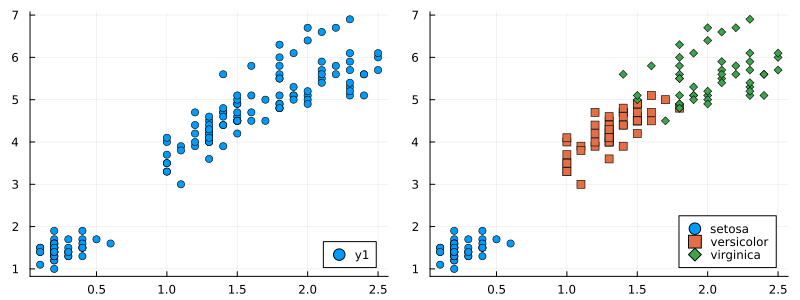

In [56]:
plot(plt1, plt2, layout=(1, 2), size=(800, 300), legend=:bottomright)

#### コード12-16. ペアプロットの例（"iris"データセット）

In [57]:
using Plots.PlotMeasures

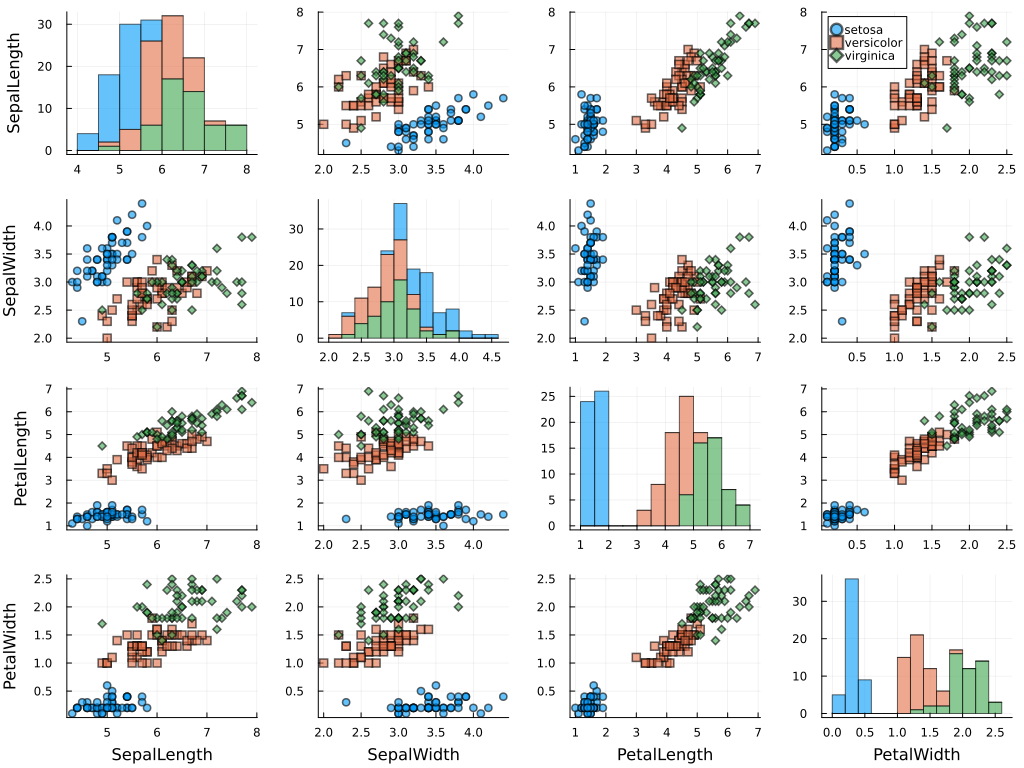

In [58]:
let iris=iris
    _hist(attr) = @df iris groupedhist(iris[!, attr], group=:Species,
        bins=11, bar_position=:stack, alpha=0.6, legend=nothing)
    _scatter(attr1, attr2) = @df iris scatter(iris[!, attr1], iris[!, attr2], group=:Species,
        m=[:circle :rect :diamond], alpha=0.6, legend=nothing)
    attrs = [:SepalLength, :SepalWidth, :PetalLength, :PetalWidth]
    _plts = [attr1==attr2 ? _hist(attr1) : _scatter(attr1, attr2)
        for attr1 in attrs, attr2 in attrs]
    for x = 1:4
        plot!(_plts[x, 4], xlabel=string(attrs[x]))
    end
    for y = 1:4
        plot!(_plts[1, y], ylabel=string(attrs[y]))
    end
    plot!(_plts[4, 1], legend=:topleft)
    plot(_plts...; layout=(4, 4), size=(1024, 768), leftmargin=10px)
end